In [1]:
# %cd ..
import numpy as np, matplotlib.pyplot as plt
import inputs, simuls, analysis
from itertools import cycle
results = analysis.GetResults(verbose=True)

# PenEasy SPC simulation

In [2]:
pid = 'SPC'
ver = '24'
# Initialize PenEasy Input Editor
peneasy_inps = inputs.PenEasy(verbose=True)

# Initialize Simulators (identified by pid)
peneasy_sims = simuls.PenEasy(verbose=True)
peneasy_sims.activate_pid(pid, ver)

penEasy 2024 SPC activated


In [3]:
SIZE = [1]*3   
STEP = [8.0]*3  #cm
nhist = "1e6"

peneasy_inps.edit_seed(pid)
peneasy_inps.edit_source_nhist(pid, nhist)
peneasy_inps.edit_voxSize(pid, SIZE, STEP)

"penEasy/pen*.in" random seeds modified to 11797 and 2892
"penEasy/pen??_spc.in" and "penEasy/pen??_nuc.in" number of histories modified to 1e6
"penEasy/phantomN.vox" updated to point source of activity 1e6
"penEasy/pen??_spc.in" and "penEasy/pen??_nuc.in" coordinates of box center modified to (4, 4, 4)
"penEasy/phantomN.vox" voxel size modified to (8.0, 8.0, 8.0)


In [4]:
isotopes = ["Rb82", "I124"] 
MATS = [
    #material   mat_name   mat_id  density (g/cm3)
    {'lung' : ['lungICRP', 1,     0.30]},
    {'bone' : ['boneB100', 1,     1.45]},
        ]

peneasy_inps.verbose = False
for iso in isotopes:
    print(f"****SIMULATING {iso}****")
    peneasy_inps.edit_isotope(pid, iso)
    for MAT in MATS:
        material = list(MAT.keys())[0]
        print(f"Simulating {material}")
        peneasy_inps.edit_mat(pid, MAT, SIZE, STEP)
    
        res_folder = f"RESULTS/SPC/{material.capitalize()}/PenEasy20{ver}_xyz"
        peneasy_sims.simulate(pid, get_times=True, time_samples=1, output_dir=res_folder, final_file=f"{iso}.dat.original")

****SIMULATING Rb82****
Simulating lung
penEasy 2024 SPC real time: 151.474 +- 0.000 s
Simulating bone
penEasy 2024 SPC real time: 166.127 +- 0.000 s
****SIMULATING I124****
Simulating lung
penEasy 2024 SPC real time: 136.706 +- 0.000 s
Simulating bone
penEasy 2024 SPC real time: 151.230 +- 0.000 s


In [ ]:
for MAT in MATS:
    material = list(MAT.keys())[0]
    res_folder = f"RESULTS/SPC/{material.capitalize()}/PenEasy20{ver}_xyz"
    times_file = res_folder + "/" + pid + "_times.txt"
    times = np.loadtxt(times_file).astype("str")
    times[:,1], times[:,0] = times[:,0], isotopes
    np.savetxt(times_file, times, fmt='%s')
    print(f"Saved times for {material} in {times_file}")

# PeneloPET simulation

In [ ]:
pid = '2024'
# Initialize PeneloPET Input Editor
penelopet_inps = inputs.PeneloPET(verbose=True)

# Initialize Simulators (identified by pid)
penelopet_sims = simuls.PeneloPET(verbose=True)
penelopet_sims.activate_pid('2024')

In [ ]:
MATS = [
    #material   mat_name   mat_id  density (g/cm3)
    {'Lung' : ['lung', 1,     0.30+00]},
    {'Bone' : ['bone_B100', 1,     1.45+00]}
        ]
nhist = "1.1e6"

pid = '2024'
penelopet_inps.edit_seed(pid, 12345, 54321)

In [ ]:
isotopes = ["C11", "F18", "Ga68"] 


penelopet_inps.verbose = False
for MAT in MATS:
    material = list(MAT.keys())[0]
    print(f"****SIMULATING {material}****")
    penelopet_inps.edit_mat(pid, MAT)
    res_folder = f"RESULTS/SPC/{material}/PeneloPET2024_xyz"
    for iso in isotopes:
        print(f"Simulating {iso}")
        penelopet_inps.edit_isotope(pid, iso)
        if iso == "I124":
            penelopet_inps.edit_source_activity(pid, str(float(nhist)*5))
        else:
            penelopet_inps.edit_source_activity(pid, nhist)
        penelopet_sims.simulate(pid, get_times=True, time_samples=1, output_dir=res_folder, final_file=f"{iso}")

In [ ]:
material = 'Lung'
res_folder = f"RESULTS/SPC/{material}/PeneloPET2024_xyz"
times_file = res_folder + "/" + pid + "_times.txt"
times = np.loadtxt(times_file).astype("str")
times[:,1], times[:,0] = times[:,0], isotopes
np.savetxt(times_file, times, fmt='%s')

# vGATE 9.x simulation

In [ ]:
pid = '9'
# Initialize GATE Input Editor
gate_inps = inputs.GATE(verbose=True)

# Initialize Simulators (identified by pid)
gate_sims = simuls.GATE(verbose=True)
gate_sims.activate_pid(pid, output_format='dat')

In [ ]:
nhist = "1e6"

gate_inps.edit_seed(pid)
gate_inps.edit_source_nhist(pid, nhist)

In [ ]:
isotopes = ["C11", "F18", "Ga68"] 
MATS = {
    # SIZE     STEP (cm)   material   mat_name   mat_id  density (g/cm3)
    ((20,)*3, (0.3,)*3 ) : {'lung' : ['LungICRP', 2,     0.30+00]},
    ((20,)*3, (0.07,)*3) : {'bone' : ['BoneB100', 12,    1.45+00]}
        }

gate_inps.verbose = False
for STEPnSIZE, MAT in MATS.items():
    material = list(MAT.keys())[0]
    # if material == 'lung':
    #     continue
    print(f"****SIMULATING {material}****")

    SIZE, STEP = STEPnSIZE
    gate_inps.edit_voxSize(pid, SIZE, STEP)
    gate_inps.edit_mat(pid, MAT, SIZE, STEP)

    res_folder = f"RESULTS/SPC/{material.capitalize()}/GATE93_xyz"
    for iso in isotopes:
        print(f"--Simulating {iso}")
        gate_inps.edit_isotope(pid, iso)
        gate_sims.simulate(pid, get_times=True, time_samples=1, output_dir=res_folder, final_file=f"{iso}")


In [ ]:
import numpy as np

for STEPnSIZE, MAT in MATS.items():
    material = list(MAT.keys())[0]
    if material == 'lung':
        continue
    res_folder = f"RESULTS/SPC/{material.capitalize()}/GATE93_xyz"
    times_file = res_folder + "/" + pid + "_times.txt"
    times = np.loadtxt(times_file).astype("str")
    times[:,1], times[:,0] = times[:,0], isotopes
    np.savetxt(times_file, times, fmt='%s')

# GATE 7.0beta simulation

In [ ]:
pid = '7'
# Initialize GATE Input Editor
gate_inps = inputs.GATE(verbose=True)

# Initialize Simulators (identified by pid)
gate_sims = simuls.GATE(verbose=True)
gate_sims.activate_pid(pid, output_format='dat')

In [ ]:
isotopes = ["C11", "F18"] 
MATS = [
    # material   mat_name   mat_id  density (g/cm3)
    {'lung' : ['LungICRP', 2,     0.30+00]},
    {'bone' : ['BoneB100', 12,    1.45+00]},
]
nhist = "1e6"

gate_inps.edit_seed(pid)
gate_inps.edit_source_nhist(pid, nhist)

In [ ]:
gate_inps.verbose = False
for MAT in MATS:
    material = list(MAT.keys())[0]
    print(f"****SIMULATING {material}****")

    SIZE, STEP = (20,)*3, (0.4,)*3
    gate_inps.edit_mat(pid, MAT, SIZE, STEP)

    res_folder = f"RESULTS/SPC/{material.capitalize()}/GATE7_xyz"
    for iso in isotopes:
        print(f"--Simulating {iso}")
        gate_inps.edit_isotope(pid, iso)
        gate_sims.simulate(pid, get_times=True, time_samples=1, output_dir=res_folder, final_file=f"{iso}")


In [ ]:
print(MATS.items())

In [ ]:
material = 'Bone'
res_folder = f"RESULTS/SPC/{material}/GATE7_xyz"
times_file = res_folder + "/" + pid + "_times.txt"
times = np.loadtxt(times_file).astype("str")
times[:,1], times[:,0] = times[:,0], isotopes
np.savetxt(times_file, times, fmt='%s')

# Results analysis

In [7]:
program_folder = "PenEasy2024_xyz"
mat = "Bone"
folder = f"RESULTS/SPC/{mat}/{program_folder}"
trim = int(1e6)

if mat == "Bone":
    rthresh = {"C11" : 4, "F18" : 2, "Ga68" : 8}
elif mat== "Lung":
    rthresh = {"C11" : 15, "F18" : 8, "Ga68" : 30}
elif mat == "Water":
    rthresh = {"C11" : 5, "F18" : 3, "Ga68" : 10}

for iso in rthresh.keys():
    if program_folder == "GATE7_xyz" and iso not in ["C11", "O15", "F18"]:
        continue
    print(f"Filtering {iso}")
    threshold = rthresh[iso] #mm
    analysis.filter_rmax(f"{folder}/{iso}.dat.original", f"{folder}/{iso}.dat", threshold=threshold, trim=trim, fmt='%.6f')

Filtering C11
Filtered 'RESULTS/SPC/Bone/PenEasy2024_xyz/C11.dat.original' to 'RESULTS/SPC/Bone/PenEasy2024_xyz/C11.dat': 0 points removed
Filtering F18
Filtered 'RESULTS/SPC/Bone/PenEasy2024_xyz/F18.dat.original' to 'RESULTS/SPC/Bone/PenEasy2024_xyz/F18.dat': 0 points removed
Filtering Ga68
Filtered 'RESULTS/SPC/Bone/PenEasy2024_xyz/Ga68.dat.original' to 'RESULTS/SPC/Bone/PenEasy2024_xyz/Ga68.dat': 0 points removed


In [2]:
histo_bins = 401
histo_step = .05 #mm
isotopes = ["C11", "F18", "Ga68"] 
mats = ["Lung", "Water", "Bone"]
pfolders = {
    "PHITS 3.3":"PHITS_xyz", 
    # "PenEasy 2020":"PenEasy2020_xyz",
    "PenEasy 2024":"PenEasy2024_xyz",
    # "PeneloPET 2024":"PeneloPET2024_xyz", 
    # "GATE 7.0":"GATE7_xyz",
    # "GATE 9.2":"GATE92_xyz", 
    "GATE 9.3":"GATE93_xyz",
}

labels_iso = {mat:{iso:[] for iso in isotopes} for mat in mats}
labels_prg = {mat:{p:[] for p in pfolders.keys()} for mat in mats}

results.active_results.clear()
for mat in mats:
    for iso in isotopes:
        for pname, pfolder in pfolders.items():
            if pfolder == "GATE7_xyz" and iso not in ["C11", "F18"]: continue
            # file with results
            rf = f"RESULTS/SPC/{mat}/{pfolder}/{iso}.dat"
            # result label
            rl = f"{pname} {iso} {mat}"
            
            # load results
            results.load(rl, rf, [histo_bins]*3, [histo_step/10]*3)

            # store labels
            labels_iso[mat][iso].append(rl)
            labels_prg[mat][pname].append(rl)

PHITS 3.3 C11 Lung loaded
PenEasy 2024 C11 Lung loaded
GATE 9.3 C11 Lung loaded
PHITS 3.3 F18 Lung loaded
PenEasy 2024 F18 Lung loaded
GATE 9.3 F18 Lung loaded
PHITS 3.3 Ga68 Lung loaded
PenEasy 2024 Ga68 Lung loaded
GATE 9.3 Ga68 Lung loaded
PHITS 3.3 C11 Water loaded
PenEasy 2024 C11 Water loaded
GATE 9.3 C11 Water loaded
PHITS 3.3 F18 Water loaded
PenEasy 2024 F18 Water loaded
GATE 9.3 F18 Water loaded
PHITS 3.3 Ga68 Water loaded
PenEasy 2024 Ga68 Water loaded
GATE 9.3 Ga68 Water loaded
PHITS 3.3 C11 Bone loaded
PenEasy 2024 C11 Bone loaded
GATE 9.3 C11 Bone loaded
PHITS 3.3 F18 Bone loaded
PenEasy 2024 F18 Bone loaded
GATE 9.3 F18 Bone loaded
PHITS 3.3 Ga68 Bone loaded
PenEasy 2024 Ga68 Bone loaded
GATE 9.3 Ga68 Bone loaded


In [3]:
results.data_analysis()

Size of annihilations sample:
     PHITS 3.3 C11 Lung                      	    988257
     PenEasy 2024 C11 Lung                   	   1000000
     GATE 9.3 C11 Lung                       	   1000000
     PHITS 3.3 F18 Lung                      	   1000000
     PenEasy 2024 F18 Lung                   	    999989
     GATE 9.3 F18 Lung                       	   1000000
     PHITS 3.3 Ga68 Lung                     	   1000000
     PenEasy 2024 Ga68 Lung                  	    999975
     GATE 9.3 Ga68 Lung                      	   1000000
     PHITS 3.3 C11 Water                     	    988366
     PenEasy 2024 C11 Water                  	   1000000
     GATE 9.3 C11 Water                      	   1000000
     PHITS 3.3 F18 Water                     	   1000000
     PenEasy 2024 F18 Water                  	   1000000
     GATE 9.3 F18 Water                      	   1000000
     PHITS 3.3 Ga68 Water                    	   1000000
     PenEasy 2024 Ga68 Water                 	   1000000
 

## Plots

/scratch/petgfn/Robert/PRcomp/analysis.py:367: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(bottom=0)


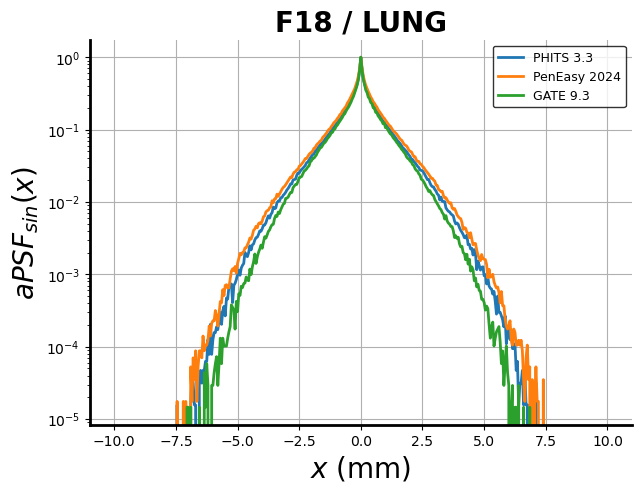

In [4]:
mat = "Lung"
iso = "F18"
l = labels_iso[mat][iso]
sl = list(labels_prg[mat].keys())
if iso not in ["C11", "F18"] and "GATE 7.0" in sl:
    sl.remove("GATE 7.0")
sl = dict(zip(l, sl))
plt.figure(figsize=(7,5))
results.plot_aPSFx(sin=True, log_scale=True, labels=l, sublabels=sl, title=f"{iso} / {mat.upper()}")
plt.show()

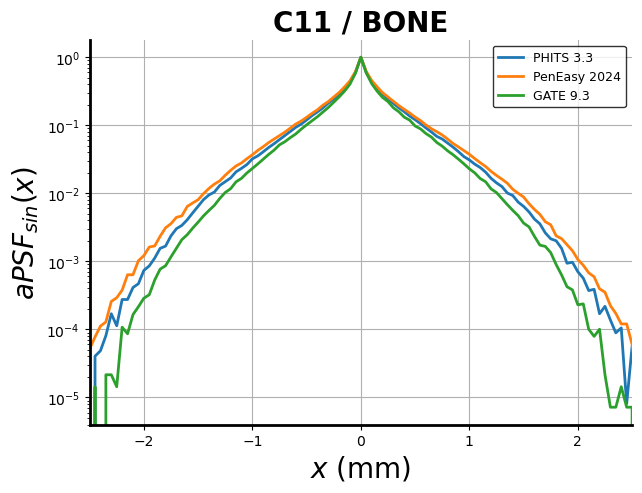

In [5]:
mat = "Bone"
iso = "C11"
l = labels_iso[mat][iso]
sl = list(labels_prg[mat].keys())
if iso not in ["C11", "F18"] and "GATE 7.0" in sl:
    sl.remove("GATE 7.0")
sl = dict(zip(l, sl))
plt.figure(figsize=(7,5))
results.plot_aPSFx(sin=True, lim=2.5, log_scale=True, labels=l, sublabels=sl, title=f"{iso} / {mat.upper()}")
plt.show()

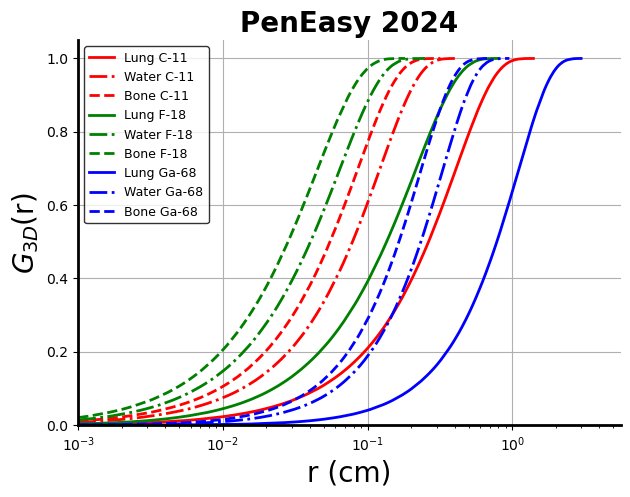

In [6]:
p = "PenEasy 2024"
color_iso = cycle(["r","g","b"])
style_mat = cycle(["-","-.","--"])

plt.figure(figsize=(7, 5))

plt.title(f"{p}")
plt.xlabel("r (cm)")
plt.ylabel(r"$G_{3D}$(r)")
for iso in isotopes if p!="GATE 7.0" else ["C11", "F18"]:
    c = next(color_iso)
    for mat in mats:
        l = f"{p} {iso} {mat}"
        res = results.active_results[l]
        x = res.rsort
        x = x
        y = res.G3D_nohist
        plt.plot(x, y, c+next(style_mat), label=f"{mat} {analysis.iso_in_plots(iso)}")
plt.xscale('log')
plt.xlim(1e-3, None)
analysis.aesthetic_plot()
# plt.legend()


plt.show()

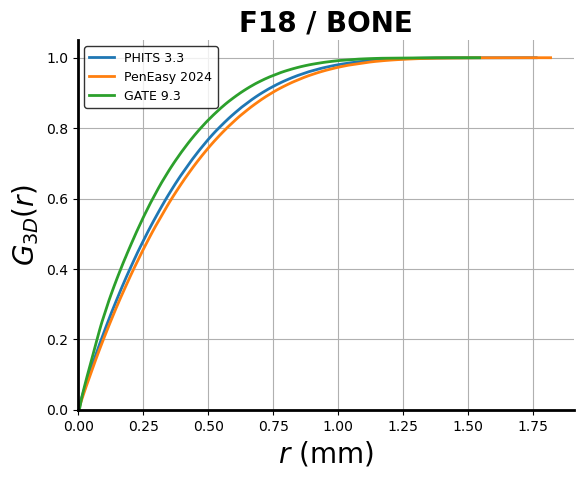

In [7]:
mat = "Bone"
iso = "F18"
l = labels_iso[mat][iso]
sl = list(labels_prg[mat].keys())
if iso not in ["C11", "F18"] and "GATE 7.0" in sl:
    sl.remove("GATE 7.0")
sl = dict(zip(l, sl))
results.plot_G3D_nohist(labels=l, sublabels=sl, title=f"{iso} / {mat.upper()}")

# PR proportionality

## W/o scale invariance

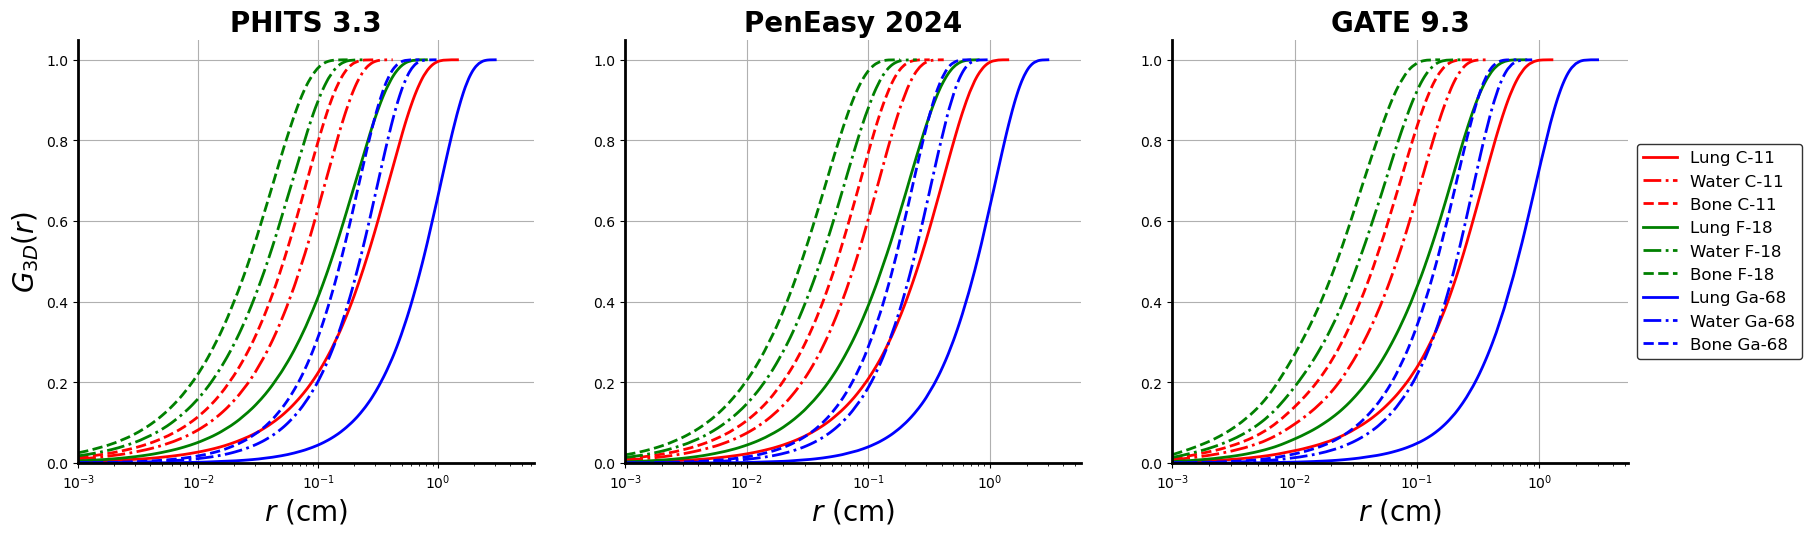

In [8]:
from itertools import cycle
style_mat = cycle(["-","-.","--"])
color_iso = cycle(["r","g","b"])
 
kmax = len(labels_prg[mat])
max_cols = 3
max_rows = int(np.ceil(kmax/max_cols))

plt.figure(figsize=(20, 5.5*max_rows))
for k, p in enumerate(pfolders.keys()):
    plt.subplot(max_rows, max_cols, k+1)
    plt.title(f"{p}")
    if k % max_cols == 0:
        plt.ylabel(r"$G_{3D}(r)$")
    if k >= kmax-max_cols:
        plt.xlabel(r"$r$ (cm)")
    for iso in isotopes if p!="GATE 7.0" else ["C11", "F18"]:
        c = next(color_iso)
        for mat in mats:
            l = f"{p} {iso} {mat}"
            res = results.active_results[l]
            x = res.rsort  # cm
            x = x
            y = res.G3D_nohist
            plt.plot(x, y, c+next(style_mat), label=f"{mat} {analysis.iso_in_plots(iso)}")
    plt.xscale('log')
    plt.xlim(1e-3, None)
    ax, leg = analysis.aesthetic_plot(legend_size=12)
    leg.set_visible(False)

leg.set_visible(True)
leg.set_loc('center')
leg.set_bbox_to_anchor((1.2, 0.5))
plt.show()

## W/ scale invariance

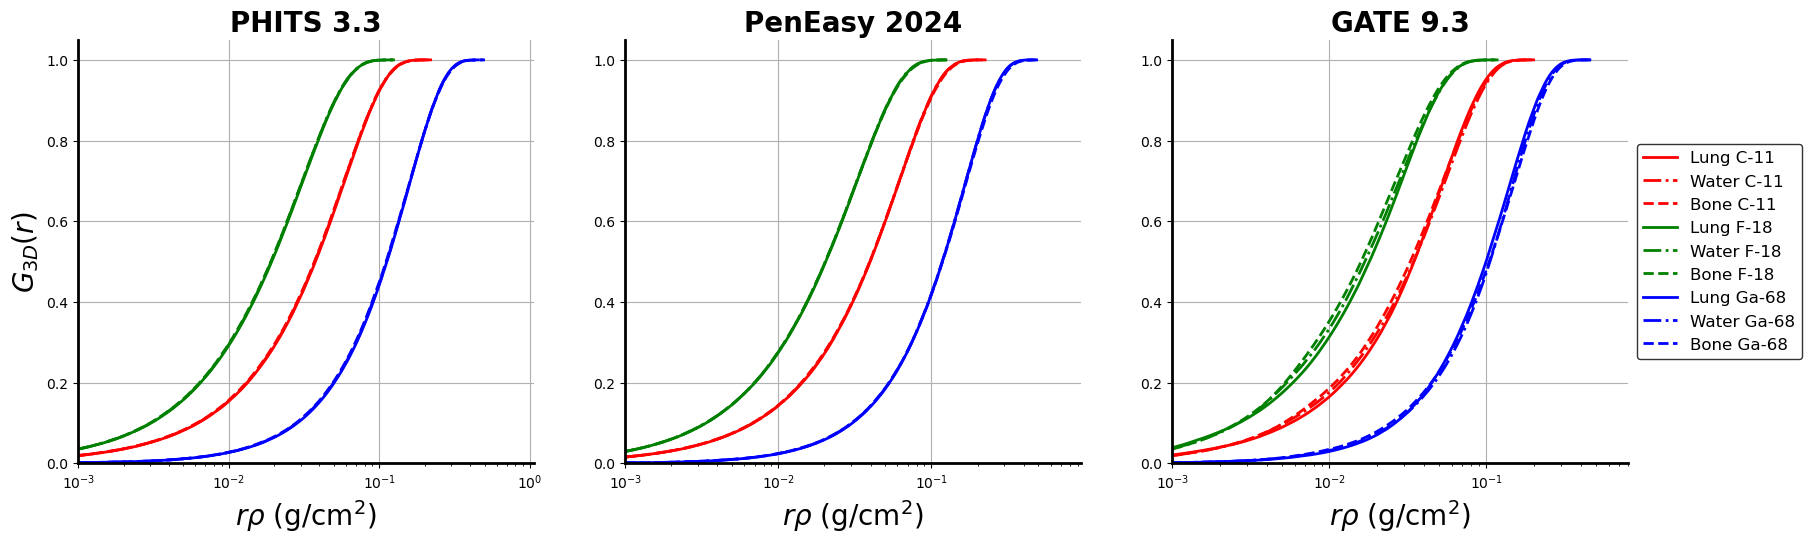

In [9]:
from itertools import cycle
style_mat = cycle(["-","-.","--"])
color_iso = cycle(["r","g","b"])

dens = { # g/cm3
    "Lung":0.3000*7.14/14.20,
    "Water":1.000*7.22/14.32,
    "Bone":1.4500*8.73/17.59,
        }
 
kmax = len(labels_prg[mat])
max_cols = 3
max_rows = int(np.ceil(kmax/max_cols))


plt.figure(figsize=(20, 5.5*max_rows))
for k, p in enumerate(pfolders.keys()):
    plt.subplot(max_rows, max_cols, k+1)
    plt.title(f"{p}")
    if k % max_cols == 0:
        plt.ylabel(r"$G_{3D}(r)$")
    if k >= kmax-max_cols:
        plt.xlabel(r"$r\rho$ (g/cm$^2$)")
    for iso in isotopes if p!="GATE 7.0" else ["C11", "F18"]:
        c = next(color_iso)
        for mat in mats:
            l = f"{p} {iso} {mat}"
            res = results.active_results[l]
            x = res.rsort
            x = x*dens[mat]
            y = res.G3D_nohist
            plt.plot(x, y, c+next(style_mat), label=f"{mat} {analysis.iso_in_plots(iso)}")
    plt.xscale('log')
    plt.xlim(1e-3, None)
    ax, leg = analysis.aesthetic_plot(legend_size=12)
    leg.set_visible(False)
    

leg.set_visible(True)
leg.set_loc('center')
leg.set_bbox_to_anchor((1.2, 0.5))
plt.show()

## Plots for the paper

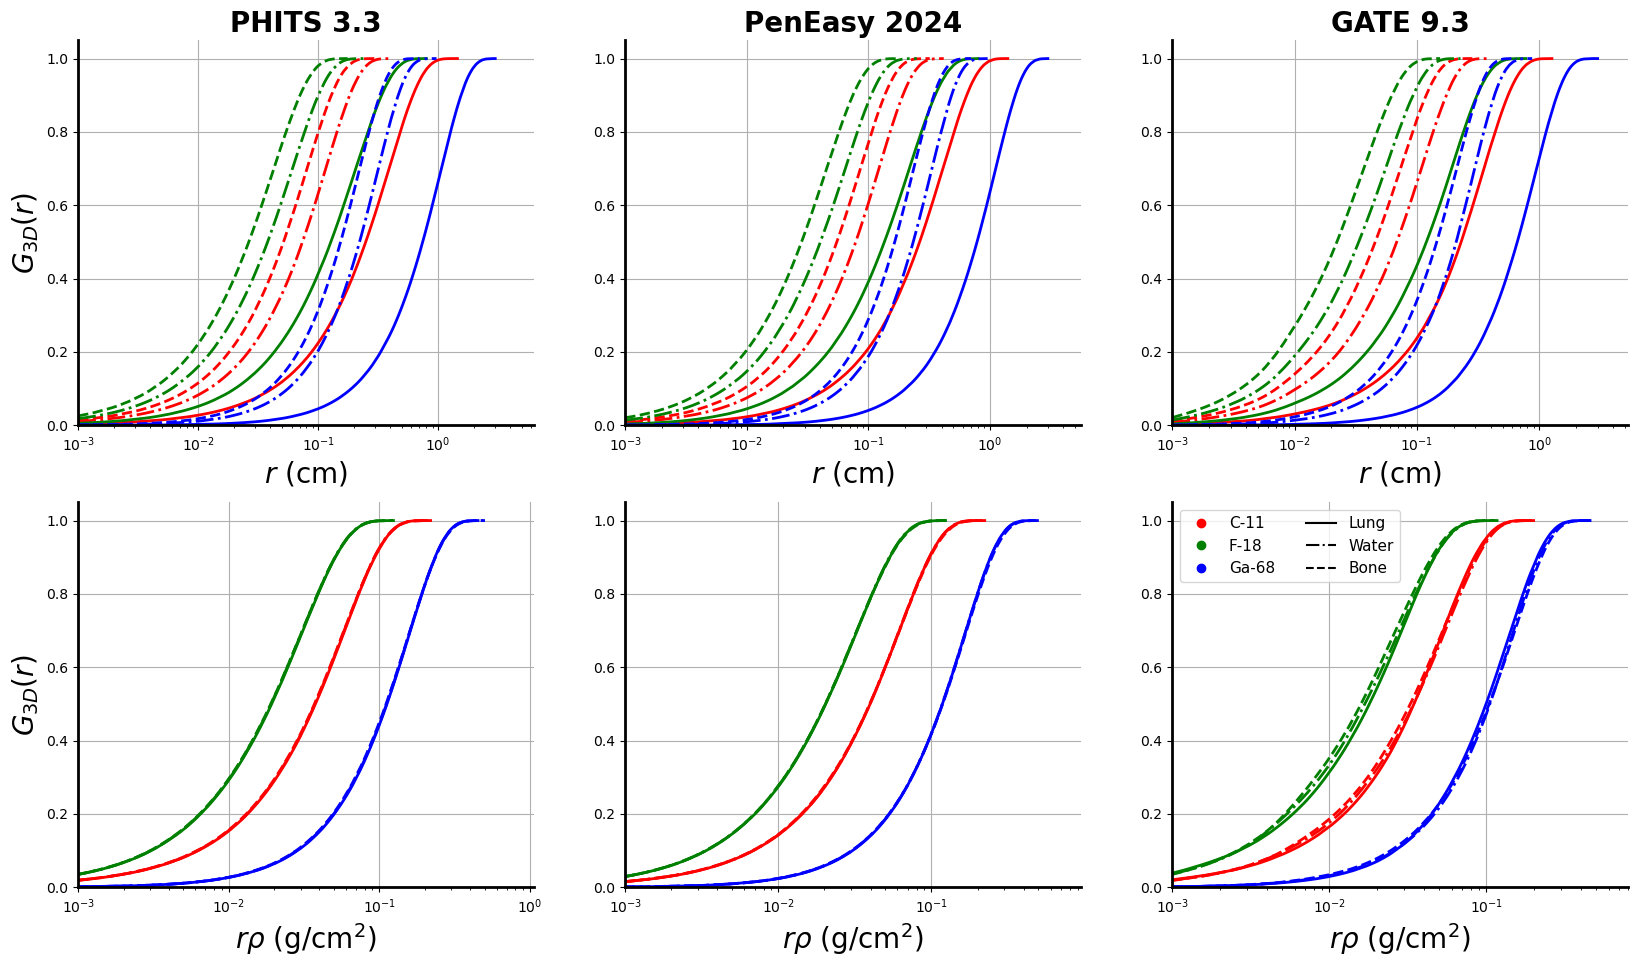

In [10]:
from itertools import cycle
custom_styles = ["-","-.","--"]
custom_colors = ["r","g","b"]
dens = { # g/cm3
    "Lung":0.3000*7.14/14.20,
    "Water":1.000*7.22/14.32,
    "Bone":1.450*8.73/17.59,
        }

style_mat = cycle(custom_styles[:len(mats)])
color_iso = cycle(custom_colors[:len(isotopes)])
 
max_cols = 3
max_rows = 2
kmax = max_cols*max_rows

plt.figure(figsize=(5*(max_cols+1), 5.5*max_rows))
for k, p in enumerate(list(pfolders.keys())*2):
    plt.subplot(max_rows, max_cols, k+1)
    if k % max_cols == 0:
        plt.ylabel(r"$G_{3D}(r)$")
    if k >= kmax-max_cols:
        plt.xlabel(r"$r\rho$ (g/cm$^2$)")
    else:
        plt.title(f"{p}")
        plt.xlabel(r"$r$ (cm)")
    for iso in isotopes if p!="GATE 7.0" else ["C11", "F18"]:
        c = next(color_iso)
        for mat in mats:
            l = f"{p} {iso} {mat}"
            res = results.active_results[l]
            x = res.rsort
            if k >= max_cols: x = x*dens[mat]
            y = res.G3D_nohist
            plt.plot(x, y, c+next(style_mat), label=f"{mat} {analysis.iso_in_plots(iso)}")
    plt.xscale('log')
    plt.xlim(1e-3, None)
    ax, leg = analysis.aesthetic_plot(legend_size=12)
    leg.set_visible(False)


for iso,c in zip(isotopes, custom_colors[:len(isotopes)]):
    ax.plot([],[], c+'o', label=analysis.iso_in_plots(iso))
for mat,s in zip(mats, custom_styles[:len(mats)]):
    ax.plot([],[], 'k'+s, label=mat)
leg = ax.legend(handles=ax.get_lines()[-6:], 
                loc='upper left', 
                fontsize=11, 
                ncol=2)
# leg.set_bbox_to_anchor((1.2, 0.5))
plt.show()

In [11]:
edens = { # g/cm3
    "Lung":0.3000*7.14/14.20,
    "Water":1.000*7.22/14.32,
    "Bone":1.4500*8.73/17.59,
        }
mdens = { # g/cm3
    "Lung":0.3000,
    "Water":1.000,
    "Bone":1.4500,
        }

def cosine_similarity(f1, f2):
    f1 = np.array(f1)
    f2 = np.array(f2)
    similarity = np.dot(f1, f2) / (np.linalg.norm(f1) * np.linalg.norm(f2))
    return similarity


# acorr = lambda x, y: 1 - cosine_similarity(x, y)  # cosine distance
# acorr = lambda x, y: 1 - np.corrcoef(x, y)[0, 1]  # pearson distance
acorr = lambda x, y: np.sqrt(np.sum((x-y)**2)/len(x))   # rmse
# acorr = lambda x, y: np.sum((x-y)**2/(y+1e-4)) # chi2


for k, p in enumerate(list(pfolders.keys())):
    for iso in isotopes if p!="GATE 7.0" else ["C11", "F18"]:
        scaled_dists = []
        l = f"{p} {iso}"
        min_len = 1e7   # max len should be 1e6
        for mat in mats:
            res = results.active_results[l+f" {mat}"]
            x = res.rsort
            min_len = min(len(x), min_len)
            x1 = x*edens[mat]
            x2 = x*mdens[mat]
            y = res.G3D_nohist
            scaled_dists.append(np.array([x1, 
                                          x2, 
                                        #   x1/x1.sum()-x2/x2.sum(), 
                                          y]))
        sd = np.array([scaled_dists[i][:,:min_len] for i in range(len(mats))])
        x1ccs = np.array([acorr(sd[i,0], sd[j,0]) for i in range(len(sd)) for j in range(i+1, len(sd))])
        x2ccs = np.array([acorr(sd[i,1], sd[j,1]) for i in range(len(sd)) for j in range(i+1, len(sd))])
        # x3ccs = np.array([acorr(sd[i,2], sd[j,2]) for i in range(len(sd)) for j in range(i+1, len(sd))])
        print(f"{l:20}  Elec dens: {np.mean(x1ccs):.2e} ({np.std(x1ccs)/np.mean(x1ccs)*100:.1f}%)\t" +
                      f"Mass dens: {np.mean(x2ccs):.2e} ({np.std(x2ccs)/np.mean(x2ccs)*100:.1f}%)\t" )#+
                    #   f"Diff dens: {x3ccs} ({np.std(x3ccs)/np.mean(x3ccs)*100:.1f}%)")
    print()


PHITS 3.3 C11         Elec dens: 5.03e-04 (12.8%)	Mass dens: 1.64e-03 (32.2%)	
PHITS 3.3 F18         Elec dens: 2.27e-04 (3.2%)	Mass dens: 8.51e-04 (32.2%)	
PHITS 3.3 Ga68        Elec dens: 1.10e-03 (37.7%)	Mass dens: 4.06e-03 (45.0%)	

PenEasy 2024 C11      Elec dens: 5.98e-04 (47.1%)	Mass dens: 2.27e-03 (49.6%)	
PenEasy 2024 F18      Elec dens: 2.83e-04 (31.9%)	Mass dens: 1.14e-03 (42.2%)	
PenEasy 2024 Ga68     Elec dens: 2.20e-03 (54.3%)	Mass dens: 7.12e-03 (60.2%)	

GATE 9.3 C11          Elec dens: 1.68e-03 (11.3%)	Mass dens: 3.02e-03 (30.0%)	
GATE 9.3 F18          Elec dens: 1.23e-03 (32.7%)	Mass dens: 2.02e-03 (32.0%)	
GATE 9.3 Ga68         Elec dens: 5.46e-03 (28.9%)	Mass dens: 1.30e-02 (31.8%)	

